# Project 02 - Image Processing

## Student Information

- Full name:
- Student ID:
- Class:

## Required Libraries

In [4]:
# IMPORT YOUR LIBS HERE
import matplotlib.pyplot as plt
import PIL
import numpy as np

## Function Definitions

In [5]:
def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image
    '''

    # YOUR CODE HERE
    img = PIL.Image.open(img_path)
    return np.asarray(img)


def show_img(img):
    '''
    Show image

    Parameters
    ----------
    img : <your type>
        Image
    '''

    # YOUR CODE HERE
    plt.imshow(img)
    plt.show()


def save_img(img, img_path):
    '''
    Save image to img_path

    Parameters
    ----------
    img : <your type>
        Image
    img_path : str
        Path of image
    '''

    # YOUR CODE HERE
    ext = img_path.split('.')[-1].lower()
    if ext in ['png', 'pdf']:
        img.save(img_path, format=ext.upper())
    else:
        print("Unsupported file format. Please use either 'png' or 'pdf'.")


#--------------------------------------------------------------------------------
# YOUR FUNCTIONS HERE

<ins>Note:</ins> For clarity, include docstrings with each function.

## Your tests

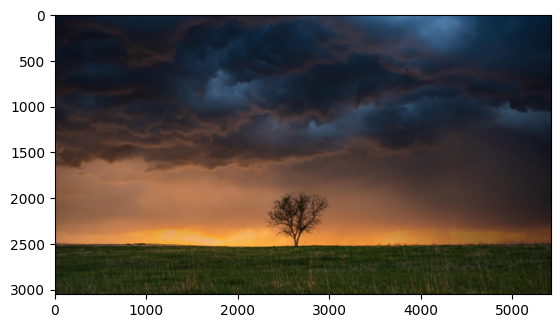

(3052, 5426, 3)


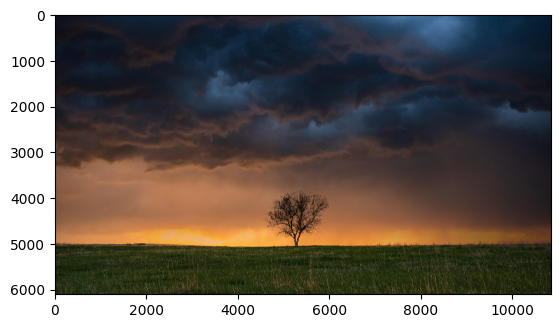

In [68]:
# YOUR CODE HERE
def change_brightness(img, level):
    '''
    Change the brightness of the image

    Parameters
    ----------
    img : np.ndarray
        Image array
    level : int
        Brightness level to be added

    Returns
    -------
    np.ndarray
        Brightness adjusted image
    '''

    # Change to float => avoid overflow
    new_img = img.astype(float) + level

    # Change back to int => normal rbg value
    new_img = np.clip(new_img, 0, 255).astype(int)

    return new_img

def change_contrast(img, level):
    '''
    Change the contrast of the image

    Parameters
    ----------
    img : np.ndarray
        Image array
    level : float
        Contrast adjustment factor.
        Values > 1 increase contrast, values between 0 and 1 decrease contrast.

    Returns
    -------
    np.ndarray
        Contrast adjusted image
    '''

    # Convert image to float to prevent overflow/underflow
    img = img.astype(float)

    # Calculate the mean of the image
    mean = np.mean(img)

    # Apply contrast adjustment
    new_img = mean + level * (img - mean)

    # Clip values to be in the range [0, 255]
    new_img = np.clip(new_img, 0, 255).astype(int)

    return new_img

def flip_image(img, axis):
    '''
    Flip the image along the specified axis

    Parameters
    ----------
    img : np.ndarray
        Image array
    axis : str
        Axis along which to flip the image ('Vertical' or 'Horizontal')

    Returns
    -------
    np.ndarray
        Flipped image
    '''

    if axis == 'Horizontal':
        new_img = img[::-1]
    if axis == 'Vertical':
        new_img = img[:, ::-1]
    return new_img

def green_blue_yellow_scaling_image(img):
    gby_img = 0.2989 * img[:, :, 0] + 0.5870 * img[:, :, 1] + 0.1140 * img[:, :, 2]
    gby_img = gby_img.astype(np.uint8)
    return gby_img

def grayscaling_image(img):
    '''
    Convert an RGB image to grayscale

    Parameters
    ----------
    img : np.ndarray
        RGB image array

    Returns
    -------
    np.ndarray
        Grayscale image
    '''

    # img = img.astype(float)
    # Calculate the gray value
    gray_pixels = np.dot(img[..., 0:3].astype(float), [0.2989, 0.5870, 0.1140])

    # Put the gray value across the rgb
    gray_img = np.stack((gray_pixels, gray_pixels, gray_pixels), axis=-1)

    # Over/Underflow  check
    gray_img = np.clip(gray_img, 0, 255)

    return gray_img.astype(int)

def add_sepia_filter(img):
    '''
    Convert an RGB image to sepia

    Parameters
    ----------
    img : np.ndarray
        RGB image array

    Returns
    -------
    np.ndarray
        Image with sepia filter
    '''

    sepia_filter = np.array([[0.393, 0.769, 0.189],
                            [0.349, 0.686, 0.168],
                            [0.272, 0.534, 0.131]])

    sepia_red_pixels = np.dot(img[..., 0:3], sepia_filter[0])
    sepia_green_pixels = np.dot(img[..., 0:3], sepia_filter[1])
    sepia_blue_pixels = np.dot(img[..., 0:3], sepia_filter[2])

    sepia_img = np.stack((sepia_red_pixels, sepia_green_pixels, sepia_blue_pixels), axis=-1)

    sepia_img = np.clip(sepia_img, 0, 255)

    return sepia_img.astype(int)

    

def convolve2d(image, kernel):
    """
    This function which takes an image and a kernel and returns the convolution of them.

    :param image: a numpy array of size [image_height, image_width].
    :param kernel: a numpy array of size [kernel_height, kernel_width].
    :return: a numpy array of size [image_height, image_width] (convolution output).
    """
    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    # convolution output
    output = np.zeros_like(image)

    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[1:-1, 1:-1] = image

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x]=(kernel * image_padded[y: y+3, x: x+3]).sum()

    return output

def convolution(matrix, kernel):
    width = matrix.shape[0]
    height = matrix.shape[1]
    # An online guide taught me that you should flip the kernel for a general convolution implementation.
    # Since my kernel is symmetrical, it doesn't matter. But it's good to note this for the future.
    kernel = np.flipud(np.fliplr(kernel))
    k_size = len(kernel)
    output_matrix = np.zeros_like(matrix)

    # pad matrix with 2 extra rows and columns, and lay the image on top of this padded_matrix
    padded_matrix = np.zeros((width + 2, height + 2, 3))
    padded_matrix[1:-1, 1:-1] = matrix

    row_ind = np.arange(1, padded_matrix.shape[0]-1)
    col_ind = np.arange(1, padded_matrix.shape[1]-1)
    row_ind, col_ind = np.meshgrid(row_ind, col_ind, indexing="ij")

    kernel_row_ind = np.arange(kernel.shape[0]) - kernel.shape[0] // 2
    kernel_col_ind = np.arange(kernel.shape[1]) - kernel.shape[1] // 2
    kernel_row_ind, kernel_col_ind = np.meshgrid(kernel_row_ind, kernel_col_ind, indexing="ij")

    row_ind = row_ind[..., np.newaxis, np.newaxis] + kernel_row_ind
    col_ind = col_ind[..., np.newaxis, np.newaxis] + kernel_col_ind

    output_matrix = np.sum(padded_matrix[row_ind, col_ind] * kernel[..., np.newaxis], axis=(-2, -3))

    output_matrix = np.clip(output_matrix, 0, 255)

    return output_matrix.astype(matrix.dtype)

def convolution_v2(matrix, kernel):
    width = matrix.shape[0]
    height = matrix.shape[1]
    # An online guide taught me that you should flip the kernel for a general convolution implementation.
    # Since my kernel is symmetrical, it doesn't matter. But it's good to note this for the future.
    kernel = np.flipud(np.fliplr(kernel))
    k_size = len(kernel)
    output_matrix = np.zeros_like(matrix)

    # pad matrix with 2 extra rows and columns, and lay the image on top of this padded_matrix
    padded_matrix = np.zeros((width + 2, height + 2, 3))
    padded_matrix[1:-1, 1:-1] = matrix

    for row in range(width):
        for col in range(height):
            for ch in range(3):
                output_matrix[row, col, ch] = (kernel * padded_matrix[row: row + k_size, col: col + k_size, ch]).sum()

    output_matrix = np.clip(output_matrix, 0, 255)

    return output_matrix.astype(float)

def convolution_v3(matrix, kernel):
    kernel = np.flipud(np.fliplr(kernel))
    pad_size = kernel.shape[0] // 2
    
    # Pad the matrix with zeros
    padded_matrix = np.pad(matrix, pad_size, mode='constant')

    # Extract sliding windows
    window_shape = (matrix.shape[0], matrix.shape[1], kernel.shape[0], kernel.shape[1])
    strides = padded_matrix.strides * 2
    windows = np.lib.stride_tricks.as_strided(padded_matrix, shape=window_shape, strides=strides)

    # Perform convolution
    output_matrix = np.einsum('ijkl,kl->ij', windows, kernel)
    output_matrix = np.clip(output_matrix, 0, 255)
    
    return output_matrix.astype(matrix.dtype)

def convolution_v4(matrix, kernel):
    kernel = np.flipud(np.fliplr(kernel))
    pad_size = kernel.shape[0] // 2
    
    # Pad the matrix with zeros
    padded_matrix = np.pad(matrix, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), mode='constant')

    # Extract sliding windows
    window_shape = (matrix.shape[0], matrix.shape[1], kernel.shape[0], kernel.shape[1], matrix.shape[2])
    strides = padded_matrix.strides[:2] + padded_matrix.strides[:2] + padded_matrix.strides[2:]
    windows = as_strided(padded_matrix, shape=window_shape, strides=strides)

    # Perform convolution
    output_matrix = np.einsum('ijklm,mn->ijln', windows, kernel)
    output_matrix = np.clip(output_matrix, 0, 255)
    
    return output_matrix.astype(matrix.dtype)

def convolution_v5(matrix, kernel):
    width, height, depth = matrix.shape

    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))

    # Pad the matrix with zeros on the border
    pad_width = kernel.shape[0] // 2
    padded_matrix = np.pad(matrix, ((pad_width, pad_width), (pad_width, pad_width), (0, 0)), mode='constant', constant_values=0)

    # Initialize the output matrix
    output_matrix = np.zeros((width, height, depth))

    # Vectorized convolution operation
    for d in range(depth):
        for i in range(width):
            for j in range(height):
                output_matrix[i, j, d] = np.sum(padded_matrix[i:i+kernel.shape[0], j:j+kernel.shape[1], d] * kernel)

    # Clip the values to be in the valid range
    output_matrix = np.clip(output_matrix, 0, 255)

    return output_matrix.astype(matrix.dtype)

def apply_kernel(img, kernel):
    '''
    Apply a convolutional kernel to the image

    Parameters
    ----------
    img : numpy array
        Image
    kernel : numpy array
        Convolutional kernel

    Returns
    -------
    numpy array
        Processed image
    '''
    if len(img.shape) == 3 and img.shape[2] == 3:  # Color image
        img_r = np.copy(img[:, :, 0])
        img_g = np.copy(img[:, :, 1])
        img_b = np.copy(img[:, :, 2])
        
        img_r = np.pad(img_r, pad_width=1, mode='constant', constant_values=0)
        img_g = np.pad(img_g, pad_width=1, mode='constant', constant_values=0)
        img_b = np.pad(img_b, pad_width=1, mode='constant', constant_values=0)
        
        # Convolve with the kernel
        result_r = np.zeros_like(img_r)
        result_g = np.zeros_like(img_g)
        result_b = np.zeros_like(img_b)
        
        for i in range(1, img_r.shape[0] - 1):
            for j in range(1, img_r.shape[1] - 1):
                result_r[i, j] = np.sum(kernel * img_r[i-1:i+2, j-1:j+2])
                result_g[i, j] = np.sum(kernel * img_g[i-1:i+2, j-1:j+2])
                result_b[i, j] = np.sum(kernel * img_b[i-1:i+2, j-1:j+2])
        
        result_r = result_r[1:-1, 1:-1]
        result_g = result_g[1:-1, 1:-1]
        result_b = result_b[1:-1, 1:-1]
        
        return np.stack((result_r, result_g, result_b), axis=2)
    else:  # Grayscale image
        img = np.pad(img, pad_width=1, mode='constant', constant_values=0)
        
        result = np.zeros_like(img)
        
        for i in range(1, img.shape[0] - 1):
            for j in range(1, img.shape[1] - 1):
                result[i, j] = np.sum(kernel * img[i-1:i+2, j-1:j+2])
        
        return result[1:-1, 1:-1]
    
def convolution_v6(matrix, kernel):
    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))

    # Extract dimensions
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Pad the matrix with zeros on the border
    padded_matrix = np.pad(matrix, ((pad_height, pad_height), (pad_width, pad_width), (0, 0)), mode='constant', constant_values=0)

    # Extract dimensions of the padded matrix
    padded_height, padded_width, _ = padded_matrix.shape

    # Initialize the output matrix
    output_matrix = np.zeros_like(matrix)

    # Create an empty array to store the intermediate results
    intermediate_results = np.zeros((padded_height - kernel_height + 1, padded_width - kernel_width + 1, kernel_height, kernel_width, matrix.shape[2]))

    # Use strides to slide the kernel over the matrix
    for i in range(kernel_height):
        for j in range(kernel_width):
            intermediate_results[:, :, i, j, :] = padded_matrix[i:i + padded_height - kernel_height + 1, j:j + padded_width - kernel_width + 1, :]

    # Perform element-wise multiplication and sum along the axis
    output_matrix = np.tensordot(intermediate_results, kernel, axes=((2, 3), (0, 1)))

    # Clip the values to be in the valid range
    output_matrix = np.clip(output_matrix, 0, 255)

    return output_matrix.astype(matrix.dtype)

def conv2d_fast(img, krn):
    
    is0, is1, ks0, ks1 = *img.shape, *krn.shape
    rs0, rs1 = is0 - ks0 + 1, is1 - ks1 + 1
    
    ix0 = np.arange(ks0)[:, None] + np.arange(rs0)[None, :]
    ix1 = np.arange(ks1)[:, None] + np.arange(rs1)[None, :]
    
    res = krn[:, None, :, None] * img[(ix0.ravel()[:, None], ix1.ravel()[None, :])].reshape(ks0, rs0, ks1, rs1)
    res = res.transpose(1, 3, 0, 2).reshape(rs0, rs1, -1).sum(axis = -1)

    return res

def conv2d_faster(img, krn):
    is0, is1 = img.shape
    ks0, ks1 = krn.shape
    
    # Compute the shape of the output
    rs0, rs1 = is0 - ks0 + 1, is1 - ks1 + 1

    # Define the strides for the input image
    strides = img.strides + img.strides
    img_2d = np.lib.stride_tricks.as_strided(img, shape=(rs0, rs1, ks0, ks1), strides=strides)
    
    # Perform the convolution
    result = np.tensordot(img_2d, krn, axes=((2, 3), (0, 1)))
    
    return result

def convolution_v7(img, krn):
    img_r = img[:, :, 0]
    img_b = img[:, :, 1]
    img_g = img[:, :, 2]

    new_img_r = conv2d_fast(img_r, krn)
    new_img_b = conv2d_fast(img_b, krn)
    new_img_g = conv2d_fast(img_g, krn)

    new_img = np.stack((new_img_r, new_img_b, new_img_g), axis=-1)

    return new_img.astype(int)

def convolution_v8(img, krn):
    img_r = img[:, :, 0]
    img_b = img[:, :, 1]
    img_g = img[:, :, 2]

    new_img_r = conv2d_faster(img_r, krn)
    new_img_b = conv2d_faster(img_b, krn)
    new_img_g = conv2d_faster(img_g, krn)

    new_img = np.stack((new_img_r, new_img_b, new_img_g), axis=-1)

    return new_img.astype(int)

def crop_circle(img):
    h, w = img.shape[0], img.shape[1]
    r = h//2

    center_x, center_y = h//2, w//2

    Y, X = np.ogrid[:h, :w]

    # Contrast the coordinate within the circle(0 and 1)
    mask = (X - center_x)**2 + (Y - center_y)**2 <= r**2

    new_img = img * mask[:, :, np.newaxis]

    return new_img

def crop_center_square(image_array, crop_size):
    '''
    Crop a square from the center of the image.

    Parameters
    ----------
    image_array : np.ndarray
        3D numpy array representing the image (height, width, channels).
    crop_size : int
        The size of the square crop(pixel).

    Returns
    -------
    np.ndarray
        Cropped square image as a 3D numpy array.
    '''
    height, width, channels = image_array.shape
    
    # Ensure the crop size is not larger than the image dimensions
    crop_size = min(crop_size, height, width)
    
    # Calculate the center of the image
    center_y, center_x = height // 2, width // 2
    
    # Calculate the coordinates for cropping
    half_crop = crop_size // 2
    y1 = max(center_y - half_crop, 0)
    y2 = min(center_y + half_crop, height)
    x1 = max(center_x - half_crop, 0)
    x2 = min(center_x + half_crop, width)
    
    # Crop the image
    cropped_image = image_array[y1:y2, x1:x2]
    
    # Handle the case where the cropped area is smaller than the desired crop_size
    if cropped_image.shape[0] < crop_size or cropped_image.shape[1] < crop_size:
        padded_image = np.pad(cropped_image, ((0, crop_size - cropped_image.shape[0]), (0, crop_size - cropped_image.shape[1]), (0, 0)), mode='constant')
        return padded_image
    
    return cropped_image

def zoom_img(img, scale):
    new_rows = int(scale*img.shape[0])
    new_cols = int(scale*img.shape[1])

    zoomed_img = np.zeros((new_rows, new_cols, img.shape[2]), dtype=img.dtype)

    for i in range(new_rows):
        for j in range(new_cols):
            zoomed_img[i, j, :] = img[int(i/scale), int(j/scale), :]

    return zoomed_img

#   https://techmaster.vn/posts/35474/convolution-tich-chap-giai-thich-bang-code-thuc-te
# https://www.youtube.com/watch?v=8rrHTtUzyZA
test_img_path = "Picture/Test/test7.jpg"

img = read_img(test_img_path)
show_img(img)
print(img.shape)

zoomed_img = zoom_img(img, 2)
show_img(zoomed_img)

# crop_img = crop_center_square(img, 250)
# show_img(crop_img)

# gray_scaled_img = grayscaling_image(img)
# show_img(gray_scaled_img[:, :, :])

# print(img)
# print(red_img.shape)

# brightness_img = change_brightness(img, -100)
# show_img(brightness_img)

# contrast_img = change_contrast(img, 0.5)
# show_img(contrast_img)

# vertical_img = flip_image(img, 'Vertical')
# show_img(vertical_img)

# horizontal_img = flip_image(img, 'Horizontal')
# show_img(horizontal_img)

# gray_scaled_img = grayscaling_image(img)
# show_img(gray_scaled_img)

# sepia_img = add_sepia_filter(img)
# show_img(sepia_img)

# circle_img = crop_circle(img)
# show_img(circle_img)

# blur_kernel = np.ones((3,3))/9
# sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
# sharpen_img = convolution_v8(img, blur_kernel)
# show_img(sharpen_img)

# blur_kernel = np.ones((3,3), dtype=float)*1/9
# print(blur_kernel)
# print(*img.shape)
# blur_img = conv2d_slow(img, blur_kernel)
# show_img(blur_img)

## Main FUNCTION

In [7]:
# YOUR CODE HERE

In [8]:
# Call main function